<font color=A10035 size = 30 >**Airline Passengers Satisfaction**

<font size = 50>Guide </font> 
<font color = 002B5B>
- Data Understanding

- Prepare Data

- Questions<font color=7D530C >

    1. <font color=A10035>Question 1</font> : Is there a relation between any of the satisfaction levels and the overall Satisfaction ?
</font>

        Analyse

        Visualise

        Brief explanation for visualisation
<font color=7D530C >
    2. <font color=A10035>Question 2</font> : Does the biological Factors like age , gender and Hours spent on flight affect the overall Satisfaction ?
</font>

        Analyse

        Visualise

        Brief explanation for visualisation
<font color=7D530C >
    3. <font color=A10035>Question 3</font> : Does the in-flight entertainment is specified for a certain age ?
   </font> 

        Analyse

        Visualise
        
        Brief explanation for visualisation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/hayfa66/hayfa66-Project-Airline-Passenger-Satisfaction/main/airline_passenger_satisfaction.csv")
dfd = pd.read_csv("https://raw.githubusercontent.com/hayfa66/hayfa66-Project-Airline-Passenger-Satisfaction/main/data_dictionary.csv")

<font color=A10035 size = 30 >**Data Understanding**

In [5]:
dfd['Description'].tolist()

['Unique passenger identifier',
 'Gender of the passenger (Female/Male)',
 'Age of the passenger',
 'Type of airline customer (First-time/Returning)',
 'Purpose of the flight (Business/Personal)',
 'Travel class in the airplane for the passenger seat',
 'Flight distance in miles',
 'Flight departure delay in minutes',
 'Flight arrival delay in minutes',
 'Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means "not applicable"',
 'Satisfaction level with the online booking experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"',
 'Satisfaction level with the check-in service from 1 (lowest) to 5 (highest) - 0 means "not applicable"',
 'Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"',
 'Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"',
 'Satisfaction level with the on-boarding

In [6]:
df2 = df[df.columns[df.dtypes!=object]].copy() # a copy of the numerical Data 
df2 = df2.drop(['ID','Age','Flight Distance','Departure Delay','Arrival Delay']
              ,axis=1) # copy of The Ratings So we can use it

In [7]:
df2.shape

(129880, 14)

<font color=A10035 size = 30 >**Prepare Data**

<font color=7D530C size=10> Untrustable relations </font> 

<font color = 002B5B>
I have noticed there no relation between '<font color=A10035>Departure and Arrival Time Convenience</font>' and '<font color=A10035> Departure Delay</font>' , '<font color=A10035>Arrival Delay</font>' columns

<font color = 002B5B>
So here is a loop that calculates the percentage of members that are satisfied with the time in 'sum of the time delay' , and calculates the of  neutral or dissatisfied members over the same sum of the time delay 
<br></br>
if there are two people that has a sum of 2000 min delay and only one of them is satisfied the loop will give us : -<br></br>
1/2 , 
1/2

In [8]:
N_Of_Satisfied = (df2['Departure and Arrival Time Convenience']>=4) # condition
N_Of_Distisfied = (df2['Departure and Arrival Time Convenience']<3) # condition
P = [] # list which will contain the people who think the time delay is convenient
B = [] # list which will contain the people who think the time delay is not convenient
M = int(df[['Departure Delay','Arrival Delay']].sum(axis=1).max())


for i in range(M): 
  PS = (df[['Departure Delay','Arrival Delay']].sum(axis=1)==i)
  NOF = df[N_Of_Satisfied&PS].shape[0]
  NOD = df[N_Of_Distisfied&PS].shape[0]
  PS = df[PS].shape[0]
  if PS != 0:
    P.append(100*NOF/PS)
    B.append(100*NOD/PS)

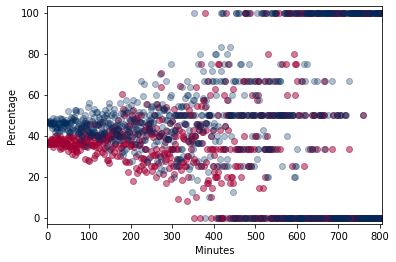

In [9]:
# plotting the result
x = np.linspace(0,len(P)+1,len(P)+1)
y = [0]
y = P + y 
y1 = [0]
y1 = B + y1

fig, ax = plt.subplots()
ax.scatter(x ,y1 ,color='#A10035',alpha=0.5)
ax.scatter(x ,y ,color='#002B5B',alpha=0.3)
ax.set(xlim=(-1,len(P)+1), xticks=np.arange(0,len(P)+23,100),
       ylim=(-3,103), yticks=np.arange(0,101, 20),
       xlabel='Minutes',ylabel='Percentage')      

plt.show()

<font size = 4 color = 002B5B> So there is no relation between '<font color=A10035>Departure and Arrival Time Convenience</font>' and '<font color=A10035> Departure Delay</font>' , '<font color=A10035>Arrival Delay</font>'  as we see the satisfied are pretty much always more than the unsatisfied
even when the sum of time of waiting are bigger
 </font>

In [10]:
df.drop(['Departure Delay','Arrival Delay'],axis=1,inplace=True)

<font size = 4 color = 002B5B> We need to know does this Flight airline gives a service respect to a class ? in this data set the not applicable situation for a service can be shown as 0
so grouping by class is there any class that has a service which is all of its values are zero ?

In [11]:
df3 = df2.copy()
df3[df3>1] = 1
df4 = pd.concat([df['Class'].copy(),df3],axis=1)
df4.groupby('Class').mean()

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Class,,,,,,,,,,,,,,
Business,0.954215,0.957754,0.999984,0.989141,0.999984,0.99992,0.999984,0.997458,0.999936,0.999405,0.99992,0.959942,0.999871,1.0
Economy,0.939443,0.955359,1.000000,0.964825,1.000000,1.00000,1.000000,0.993380,0.999931,0.998748,1.00000,0.979952,0.999931,1.0
Economy Plus,0.967697,0.951865,1.000000,0.962384,1.000000,1.00000,1.000000,0.994262,0.999362,0.997662,1.00000,0.972692,0.999362,1.0


<font size = 4 color = 002B5B> So every service is given to every class

In [12]:
del df3
del df4

<font color=7D530C size=30> Null values </font>
   

<font size = 4 color = 002B5B> In this database the null value are actually 0 not null 

so it can be considered as null or as 'not applicable' </font>

In [13]:
# percentage of missing data
100*df2[(df2==0).any(axis=1)].shape[0]/df2.shape[0]

7.940406529103788

<font size = 4 color = 002B5B> And the null values are only in the numerical columns.

so every numerical columns has how many null value ?
 </font>

In [14]:
# percentage of missing data over every level of satisfaction
df3 = df2.copy()
df3[ df3>1 ] = 1 # all the values that are not null must be 1 so we can calculate the mean
print( (100-df3.mean()*100).sort_values(ascending=False) )
del df3

Departure and Arrival Time Convenience    5.143979
Ease of Online Booking                    4.374808
In-flight Wifi Service                    3.015091
Online Boarding                           2.371420
Leg Room Service                          0.460425
Food and Drink                            0.101632
In-flight Entertainment                   0.013859
Cleanliness                               0.010779
On-board Service                          0.003850
In-flight Service                         0.003850
Check-in Service                          0.000770
Gate Location                             0.000770
Seat Comfort                              0.000770
Baggage Handling                          0.000000
dtype: float64


<font size = 4 color = 002B5B> i think %7 null values are pretty much low so we can drop it </font>

In [15]:
df.drop(df[(df2==0).any(axis=1)].index,axis=0,inplace=True)
df2.drop(df2[(df2==0).any(axis=1)].index,axis=0,inplace=True)

<font color=7D530C size=30> Convert Type of Data </font>

<font color = 002B5B>I need to change 'Satisfied' to True and 'Neutral or Dissatisfied' to False so that i can work with it easily such as using the mean of it or anything
i just need to remember that False equal to Neutral too not only Dissatisfied

First is there any  value other than 'Satisfied' and 'Neutral or Dissatisfied' ?

In [16]:
# to convert this to a boolean , must know if there is a third value or not
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [17]:
# convert column to a bool type
df.loc[df['Satisfaction']=='Satisfied','Satisfaction'] = True
df.loc[df['Satisfaction']=='Neutral or Dissatisfied','Satisfaction'] =  False
df['Satisfaction'] = df['Satisfaction'].convert_dtypes('bool')
df['Satisfaction'].dtype

<font color = 002B5B>Done

<font color=A10035 size = 30 >**Questions**

<font color=7D530C size=10> Question 1 </font> 

<font color = 002B5B>Is there a relation between any of the satisfaction levels and the overall Satisfaction ?

In [20]:
Answer = pd.Series(dtype=float)

for i,col in enumerate(df2.columns):

    '''
    if a passenger rate every factor other than the factor
    that in col

    , rate the factor in col with less than 4 

    And overall state of the passenger is unsatisfied
    
    that means the factor in col affected the overall satisfaction 
    '''

    T1 = (df2.drop(df2.columns[i],axis=1)>3).all(axis=1) # condition
    T2 = (df['Satisfaction']==False) # condition
    T3 = (df2.iloc[:,i] < 4) # condition

    # Satisfied people / ( Satisfied people and unsatisfied people )

    ans = (df[T1&T2&T3].shape[0])/(df[T1].shape[0]) 

    Answer[col]=(ans*100) # percentage

Answer = Answer.sort_values(ascending=False) 
Answer

Gate Location                             5.574183
Leg Room Service                          2.354350
Check-in Service                          1.830230
On-board Service                          1.276596
In-flight Wifi Service                    0.628323
Seat Comfort                              0.520095
Baggage Handling                          0.472590
Cleanliness                               0.315679
Food and Drink                            0.276243
In-flight Service                         0.233754
Online Boarding                           0.233645
In-flight Entertainment                   0.192400
Departure and Arrival Time Convenience    0.139211
Ease of Online Booking                    0.000000
dtype: float64

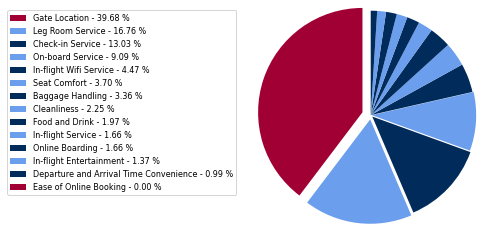

In [ ]:
# plotting the result

x = Answer.keys()
y = Answer.values

colors = ['#A10035']+['#6B9EED', '#002B5B']*6
porcent = 100.*y/y.sum()
explode = (0.1, 0.05, 0.025, 0.0125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) # explode 1st slice , 2nd ,3rd and 4th

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2
                        ,explode=explode)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                 key=lambda x: x[2],reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

<font color =A10035> **We can see that the Gate location is the most factor affecting the overall satisfaction.**

<font color=7D530C size=10> Question 2 </font> 

<font color = 002B5B> Does the biological Factors like age , gender and Hours spent on flight affect the overall Satisfaction ?

<font color = 002B5B> First must group the ages


In [ ]:
# explore the ages in the dataset to group it
print(df['Age'].sort_values().unique())

[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 79 80 85]


In [ ]:
#list containing the ranges
R = [0,10,15,20,25,30,40,50,60,70,85]
df1 = df.copy()

for i in range(10) :
    #Grouping Ages like 10 if age is less than 10 and so on
    df1.loc[df['Age'].between(R[i]-1,R[i+1],inclusive='neither'),'Age'] = R[i+1]

<font color = 002B5B> Now time for grouping the flight Distance

Roughly time spent in flight is 1 hour per 500 miles so we can group it as 500 miles.

In [ ]:
#Grouping Miles like 500 if Distance is less than 500 and so on
for i in range(0,5000,500) :  
   df1.loc[df['Flight Distance'].between(i-1,i+500,inclusive='neither'),
          'Flight Distance'] = i + 500

In [ ]:
list1 = list(df1['Age'].sort_values().unique())
list2 = list(df1['Flight Distance'].sort_values().unique())
AnsArrM = np.ones((10, 10))
AnsArrM[:,:] = -1
AnsArrF = np.ones((10, 10))
AnsArrF[:,:] = -1

'''

creating a 2d array that has -1 if no one matches the Constraints
and percentage value of the satisfied people over the distisfied.

'''
for i,v1 in enumerate(list1):
    for j,v2 in enumerate(list2):
        is_Constraints = (df1['Age']==v1)&(
                      df1['Flight Distance']==v2)&(df1['Gender']=='Male')
        if (df1[is_Constraints].shape[0])!=0:
           AnsArrM[i,j] = df1[is_Constraints]['Satisfaction'].mean()
           
for i,v1 in enumerate(list1):
    for j,v2 in enumerate(list2):
        is_Constraints = (df1['Age']==v1)&(
                      df1['Flight Distance']==v2)&(df1['Gender']=='Female')
        if(df1[is_Constraints]['Satisfaction'].shape[0])!=0:
           AnsArrF[i,j] = df1[is_Constraints]['Satisfaction'].mean()                 

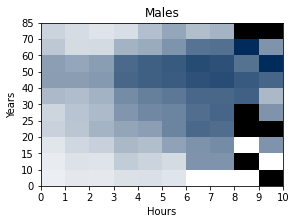

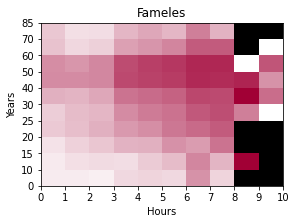

In [ ]:
def plot_(colormaps,data,Gender):
    
    '''
    
    Show the plot
    
    inputs:
    
    colormaps: colormap
    data: 2d array containing value from 0 to 1 , or -1 for undefined
    Gender: String containg the lable which will be written on the plot

       
    outputs:
    None
    
    '''

    dataAlpha = np.clip(data,0,1) #ignore -1 values
    n = len(colormaps)

    fig, axs = plt.subplots(1, n, figsize=(4, 3),
                           constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data,cmap=cmap, rasterized=True, vmin=-1, 
                           vmax=1,alpha=dataAlpha)

    #plotting Black Squeare that expresses The null information 
    dataAlpha = np.clip(data,-1,0) # ignore > 1 values 
    dataAlpha = np.where(data==-1,1,0) # all = 0 except when it -1 --> = 1

    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data,cmap=cmap, rasterized=True, vmin=-1, vmax=2,
        alpha=dataAlpha) 
    
    axs[0,0].set_title(Gender)     
    axs[0,0].set_xticks(np.arange(0,11,1))   
    axs[0,0].set_yticks(np.arange(0,11,1))      
    axs[0,0].set_yticklabels([0]+list1)     
    axs[0,0].set_xlabel('Hours') 
    axs[0,0].set_ylabel('Years') 

    plt.show()

    
cmap = clr.ListedColormap(["black", "#002B5B"])
plot_([cmap],AnsArrM,"Males")  

cmap = clr.ListedColormap(["black", "#A10035"])
plot_([cmap],AnsArrF,"Fameles") 

<font color =A10035> **Black represent the null values and the saturation represent the density of Satisfied people, So
the more they spent in the flight and the higher the age the more likely they are Satisfied, And it appears that no obvious affect respecting gender**

<font color=7D530C size=10> Question 3 </font> 

<font color = 002B5B> Does the in-flight entertainment is specified for a certain age ?

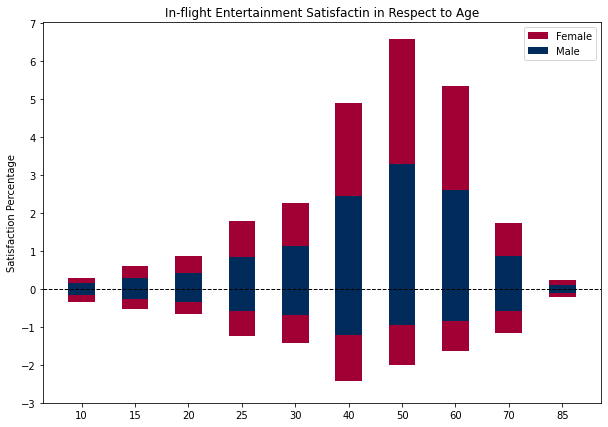

In [ ]:
AnsArr = np.zeros((10, 2)) # the data of satisfied people
AnsArrN = np.zeros((10, 2)) # the dataN means Negative > the people who are not satisfied
All = df1.shape[0]/100 # all the people

col = 'In-flight Entertainment'
Male = (df1['Gender']=='Male')
Female = (df1['Gender']=='Female')
# the really satisfied people would rate the 'Entertainment' with 5 and 1 the other way around
plus = (df1[col]==5) 
negative = (df1[col]==1)

# Array having the Percentage of every situation on all people

AnsArr[:,0] = df1[Male&plus].groupby('Age').count().iloc[:,0]/All
AnsArr[:,1] = df1[Female&plus].groupby('Age').count().iloc[:,0]/All
AnsArrN[:,0] = -df1[Male&negative].groupby('Age').count().iloc[:,0]/All
AnsArrN[:,1] = -df1[Female&negative].groupby('Age').count().iloc[:,0]/All

# Plotting the result

ind = np.arange(10)
width = 0.5
fig = plt.subplots(figsize =(10, 7)) 
plt.axhline(y=0,color='black',linestyle='--',alpha=1,linewidth=1)

p1 = plt.bar(ind, AnsArr[:,0], width,color="#002B5B") 
p2 = plt.bar(ind, AnsArr[:,1], width, bottom = AnsArr[:,0],color="#A10035")
p3 = plt.bar(ind, AnsArrN[:,0], width,color="#002B5B") 
p4 = plt.bar(ind, AnsArrN[:,1], width, bottom = AnsArrN[:,0],color="#A10035")


plt.ylabel('Satisfaction Percentage') 

plt.title('In-flight Entertainment Satisfactin in Respect to Age') 

plt.xticks(ind, df1.Age.sort_values().unique()) 

plt.yticks(np.arange(-3, 8, 1)) 

plt.legend((p2[0], p1[0]), ('Female','Male')) 


plt.show() 

<font color =A10035> **As the plot shows the people from 30 to 60 years old are the most who satisfied with this service, however we can't say for sure the service is specified for them it is only about the interest ,the people with a very young age or very old are the one who tend to rate this service with neutral rating.**